Numberical simulation

In [49]:
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import importlib
importlib.reload(constant)
importlib.reload(base)

<module 'base' from 'c:\\Users\\haime\\OneDrive\\Documents\\GitHub\\Lagrange interpolation approach for GPRX\\base.py'>

In [50]:
step_sizes = base.create_log_step_sizes(0.01, 3, 0.1)
thetas = np.asarray([np.pi/2, np.pi/3, np.pi/6])

def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return base.zz_measure(qc)

true_grad = base.true_grad(thetas)

mean_MSE_stds = []
mean_MSE_finites = []
std_MSE_stds = []
std_MSE_finites = []
for step_size in step_sizes:
    print(step_size)
    grad_finites = []
    grad_stds = []

    for _ in range(0, 1):
        grad_finite = []
        grad_std = []
        for j in range(0, thetas.shape[0]):
            length = thetas.shape[0]
            f_left = f(thetas + step_size * base.unit_vector(j, length))
            f_right = f(thetas - step_size * base.unit_vector(j, length))
            if j != 2:
                grad_std.append(base.pseudo_two_prx(f, thetas, j, step_size))
            else:
                grad_std.append(base.pseudo_four_prx(f, thetas, j))
            grad_finite.append(base.two_finite_diff(f, thetas, j, step_size))
        grad_stds.append(mean_squared_error(grad_std, true_grad))
        grad_finites.append(mean_squared_error(grad_finite, true_grad))
    mean_MSE_stds.append(np.mean(grad_stds,axis = 0))
    std_MSE_stds.append(np.std(grad_stds,axis = 0))

    mean_MSE_finites.append(np.mean(grad_finites,axis = 0))
    std_MSE_finites.append(np.std(grad_finites,axis = 0))

# np.savetxt('mean_MSE_stds.txt', mean_MSE_stds)
# np.savetxt('std_MSE_stds.txt', std_MSE_stds)
# np.savetxt('mean_MSE_finites.txt', mean_MSE_finites)
# np.savetxt('std_MSE_finites.txt', std_MSE_finites)

0.01
F1 0.11219600792468196
F1k -0.9330127018922155
F1 0.11473256898015499
F1k 8.326811464185845e-15
0.11
F1 0.08856970640110735
F1k -0.9330127018922213
F1 0.11473256898015498
F1k 5.05665972308981e-16
0.21100000000000002
F1 0.06746157804373222
F1k -0.9330127018922199
F1 0.11473256898015476
F1k 0.0
0.31301
F1 0.048117117500380925
F1k -0.9330127018922195
F1 0.1147325689801553
F1k -1.5774117295339473e-16
0.4160401
F1 0.02954933404047018
F1k -0.9330127018922194
F1 0.11473256898015476
F1k 0.0
0.520100501
F1 0.010575800507587689
F1k -0.9330127018922192
F1 0.11473256898015498
F1k 1.2566226912113977e-16
0.62520150601
F1 -0.010135231879156213
F1k -0.9330127018922192
F1 0.11473256898015474
F1k 0.0
0.7313535210701
F1 -0.034014355010983606
F1k -0.9330127018922194
F1 0.11473256898015498
F1k 0.0
0.838567056280801
F1 -0.06253893913100765
F1k -0.9330127018922192
F1 0.11473256898015498
F1k 0.0
0.946852726843609
F1 -0.09717889207014865
F1k -0.9330127018922195
F1 0.11473256898015496
F1k 0.0
1.05622125411

In [32]:
step_sizes = np.arange(10**(-2), 1, 10**(-1))
mean_grad_stds = np.asarray(np.loadtxt('mean_grad_stds.txt'))
mean_grad_finites = np.asarray(np.loadtxt('mean_grad_finites.txt'))
e_std = []
for i in range(0, mean_grad_stds.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], mean_grad_finites[i]))

### Mean 

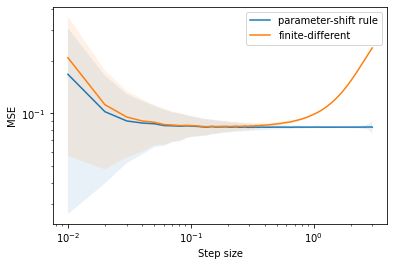

In [54]:
mean_MSE_stds = np.asarray(np.loadtxt('./ana1/mean_MSE_stds.txt'))
std_MSE_stds = np.asarray(np.loadtxt('./ana1/std_MSE_stds.txt'))
mean_MSE_finites = np.asarray(np.loadtxt('./ana1/mean_MSE_finites.txt'))
std_MSE_finites = np.asarray(np.loadtxt('./ana1/std_MSE_finites.txt'))

step_sizes = base.create_log_step_sizes(0.01, 3, 0.01)
mean_MSE_stds = np.asarray(mean_MSE_stds)
std_MSE_stds = np.asarray(std_MSE_stds)
mean_MSE_finites = np.asarray(mean_MSE_finites)
std_MSE_finites = np.asarray(std_MSE_finites)
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

<image src = "./image/step_size.png"/>

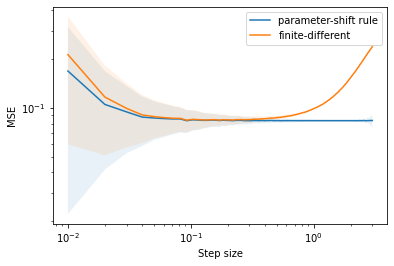

In [53]:
mean_MSE_stds = np.asarray(np.loadtxt('./ana2/mean_MSE_stds.txt'))
std_MSE_stds = np.asarray(np.loadtxt('./ana2/std_MSE_stds.txt'))
mean_MSE_finites = np.asarray(np.loadtxt('./ana2/mean_MSE_finites.txt'))
std_MSE_finites = np.asarray(np.loadtxt('./ana2/std_MSE_finites.txt'))

step_sizes = base.create_log_step_sizes(0.01, 3, 0.01)
mean_MSE_stds = np.asarray(mean_MSE_stds)
std_MSE_stds = np.asarray(std_MSE_stds)
mean_MSE_finites = np.asarray(mean_MSE_finites)
std_MSE_finites = np.asarray(std_MSE_finites)
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### Y

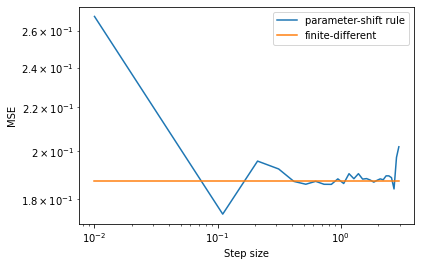

In [57]:
e_std_y, e_finite_y = [], []
for i in range(0, step_sizes.shape[0]):
    e_std_y.append(mean_squared_error([mean_grad_stds[i][1]], [true_grad[1]]))
    e_finite_y.append(mean_squared_error([mean_grad_finites[i][1]], [true_grad[1]]))
plt.plot(step_sizes, e_std_y, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite_y,  label = "finite-different")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()